### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
print(data.index.name)

None


In [5]:
data.index.rename('idx', inplace=True)

In [6]:
data['car']

idx
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12679    NaN
12680    NaN
12681    NaN
12682    NaN
12683    NaN
Name: car, Length: 12684, dtype: object

2. Investigate the dataset for missing or problematic data.

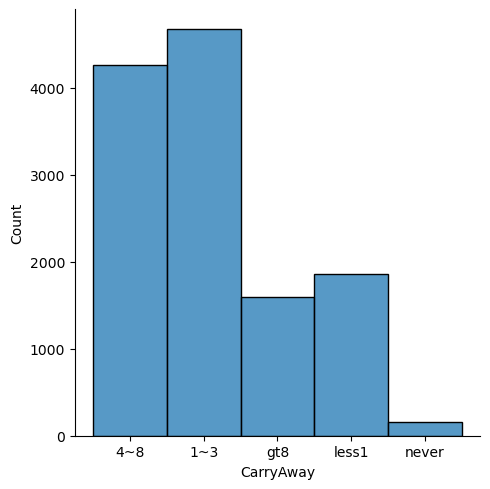

In [7]:
sns.displot(data['CarryAway'])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Scooter and motorcycle'),
  Text(1, 0, 'crossover'),
  Text(2, 0, 'Mazda5'),
  Text(3, 0, 'do not drive'),
  Text(4, 0, 'Car that is too old to install Onstar :D')])

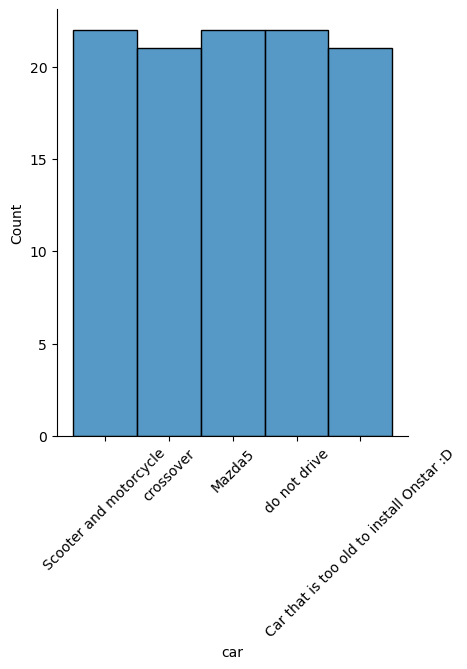

In [8]:
sns.displot(data['car'])
plt.xticks(rotation = 45)

<Axes: xlabel='Y', ylabel='car'>

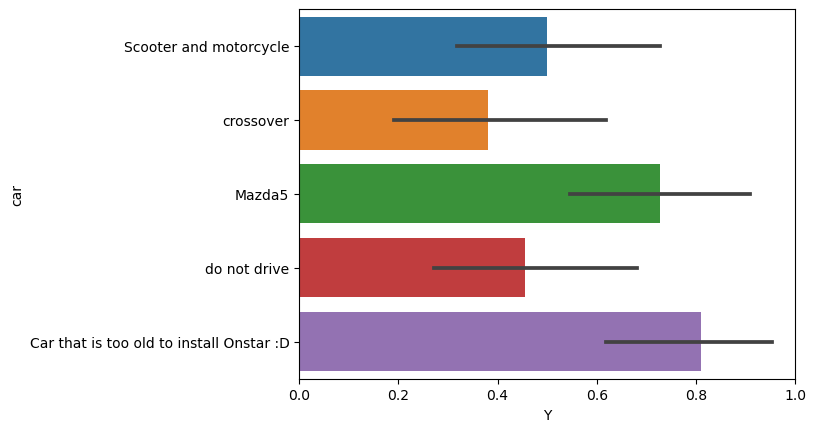

In [9]:
sns.barplot(data = data, x = "Y", y = "car")
#plt.xticks(rotation = 45)

In [10]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

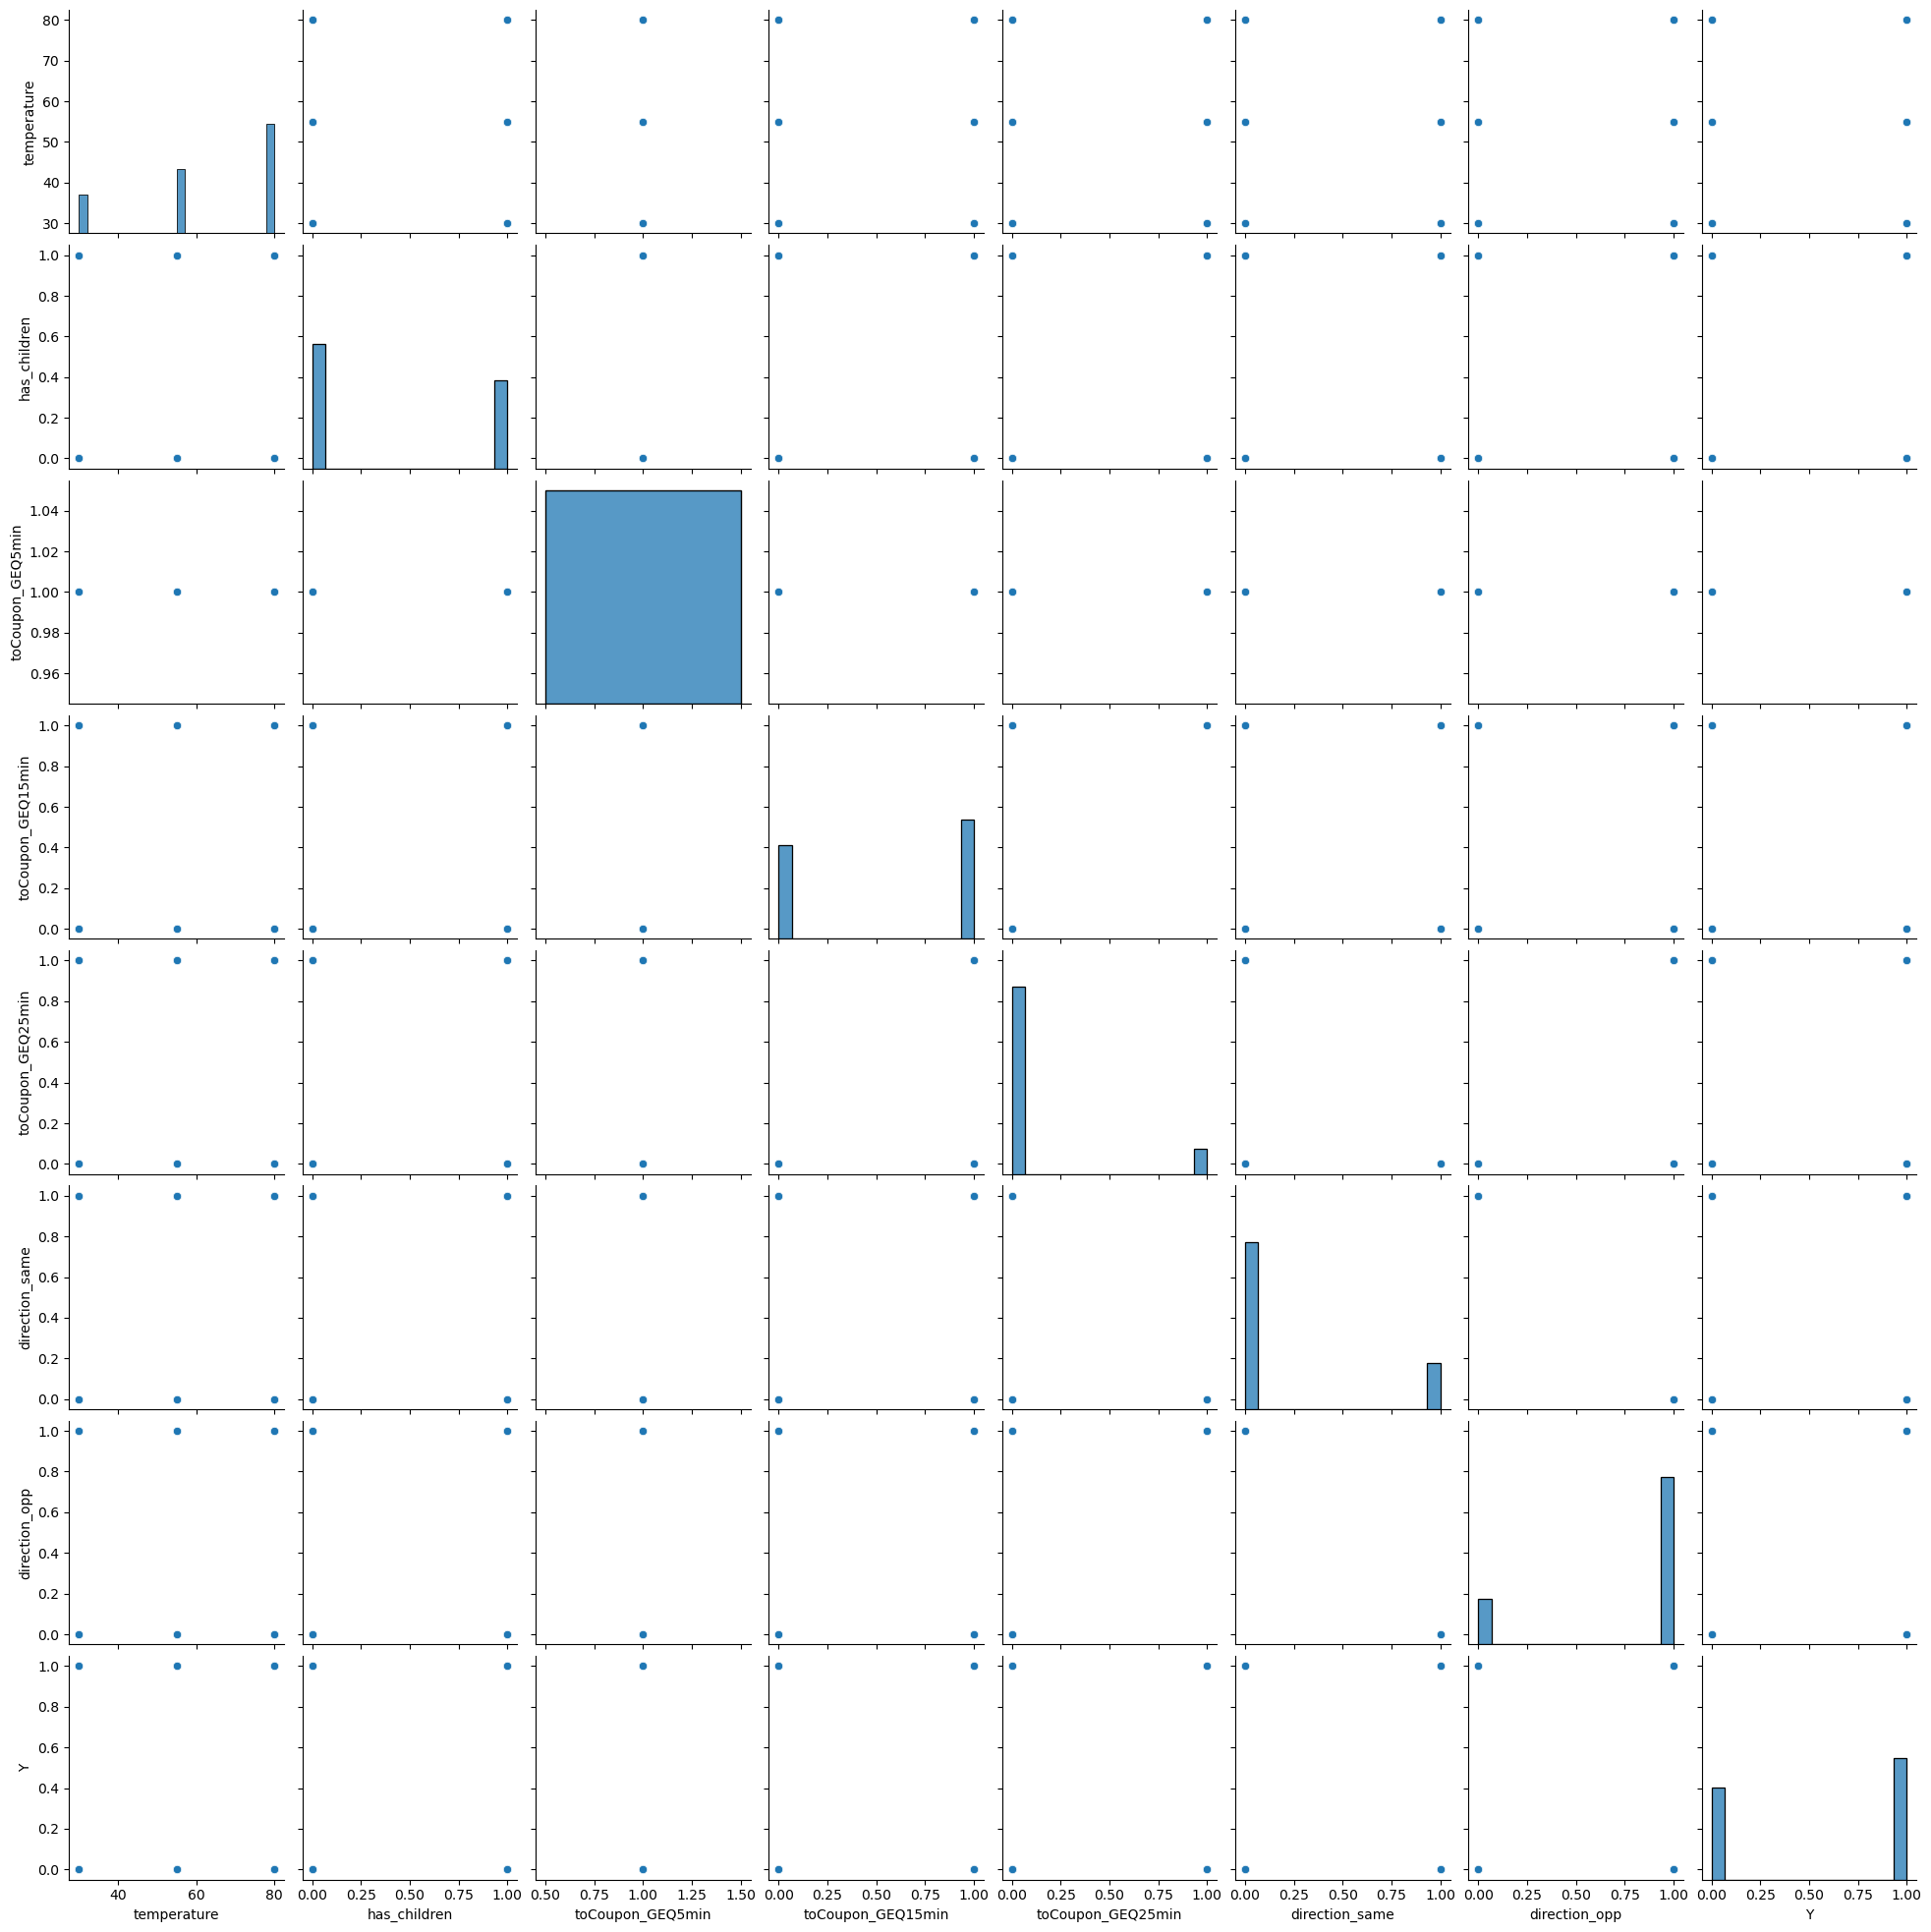

In [12]:
sns.pairplot(data)

3. Decide what to do about your missing data -- drop, replace, other...
I will set a default value for column CarryAway since all data are missing.

In [13]:
data['CarryAway'].isnull().count()

12684

In [14]:
data["CarryAway"].notnull()

idx
0        False
1        False
2        False
3        False
4        False
         ...  
12679     True
12680     True
12681     True
12682     True
12683     True
Name: CarryAway, Length: 12684, dtype: bool

4. What proportion of the total observations chose to accept the coupon? 
57%

In [15]:
total = data['Y'].count()
accept = data.query('Y == 1')['Y'].count()
print(total)
print(accept)
accept/total

12684
7210


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='age', ylabel='Y'>

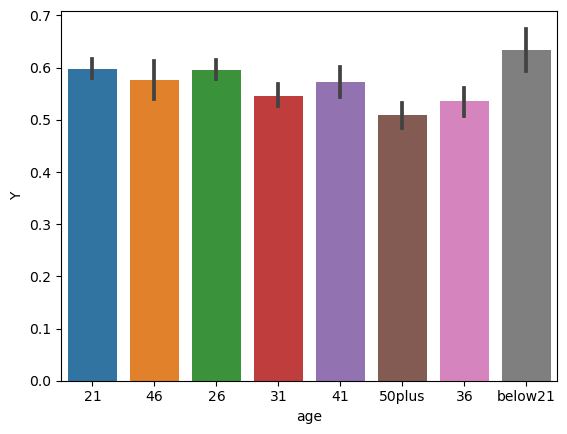

In [16]:
sns.barplot(data, x='age', y = 'Y')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

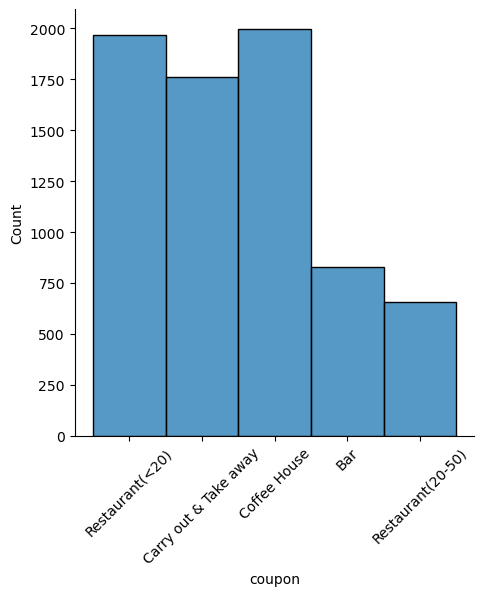

In [17]:
use_coupon = data.query('Y == 1')
sns.displot(data=use_coupon['coupon'])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Restaurant(<20)'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

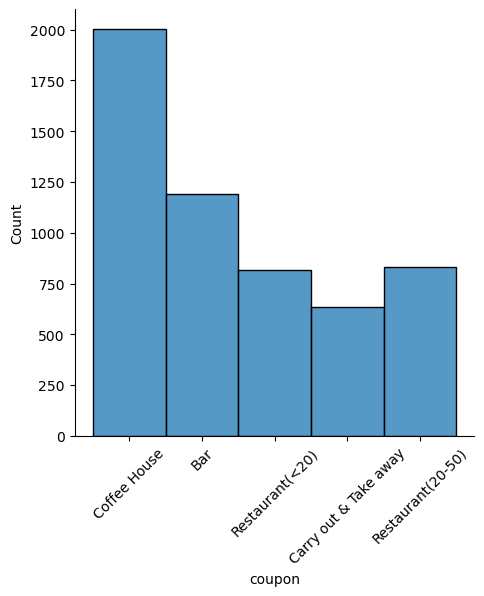

In [18]:
not_use_coupon = data.query('Y == 0')
sns.displot(data=not_use_coupon['coupon'])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

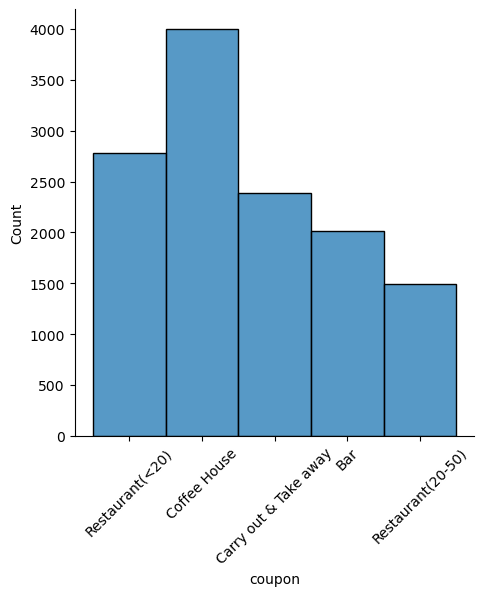

In [19]:
sns.displot(data=data['coupon'])
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

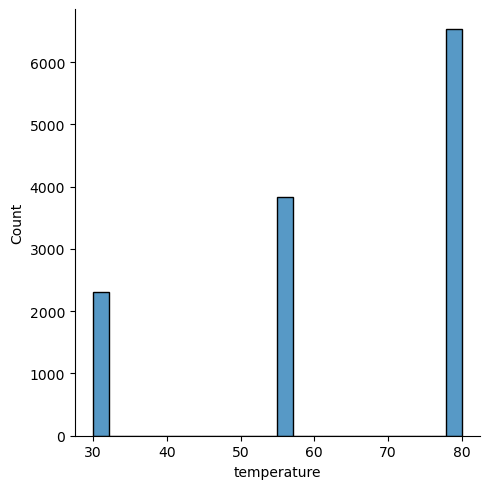

In [20]:
sns.displot(data['temperature'])

<Axes: xlabel='temperature', ylabel='Y'>

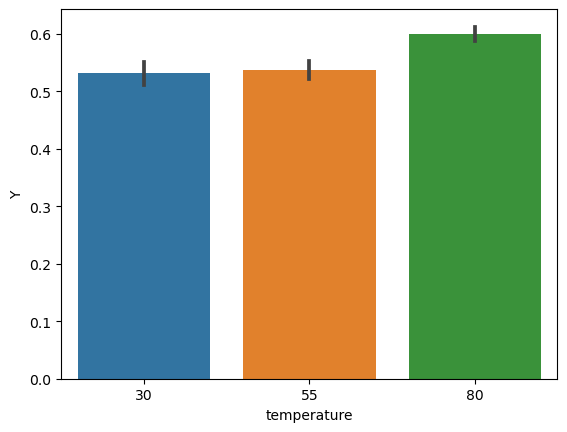

In [21]:
sns.barplot(data, x='temperature', y = 'Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar = data.query("coupon == 'Bar'")
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
idx,,,,,,,,,,,,,,,,,,,,,
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [23]:
accepted_bar = bar.query("Y == 1")
accepted_bar_count = accepted_bar["Y"].count()
bar_count = bar["Y"].count()
print(accepted_bar_count)
print(bar_count)
print("Proportion of bar coupons were accepted", accepted_bar_count/bar_count)

827
2017
Proportion of bar coupons were accepted 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


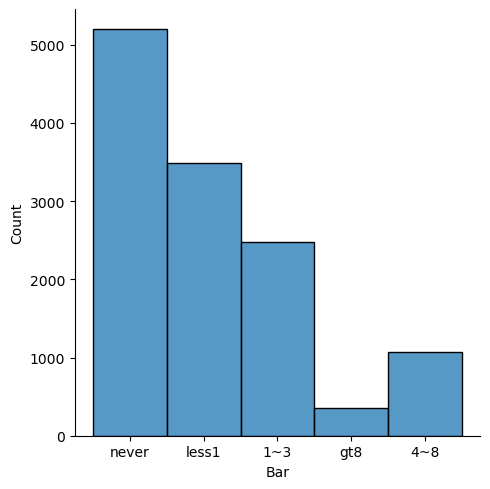

In [24]:
sns.displot(data['Bar'])

In [25]:
bar_3_or_less = bar.query("Bar == 'never' or Bar == 'less1' or Bar == '1~3'")
bar_more = bar.query("Bar == 'gt8' or Bar == '4~8'")
accepted_count_3_or_less = bar_3_or_less['Y'].count()
accepted_count_more = bar_more['Y'].count()
print("Bar coupon accepted among those who visit 3 times or less",accepted_count_3_or_less/bar['Y'].count())
print("Bar coupon accepted among those who visit more than 3 times",accepted_count_more/bar['Y'].count())

Bar coupon accepted among those who visit 3 times or less 0.8909271194843827
Bar coupon accepted among those who visit more than 3 times 0.09866137828458106


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


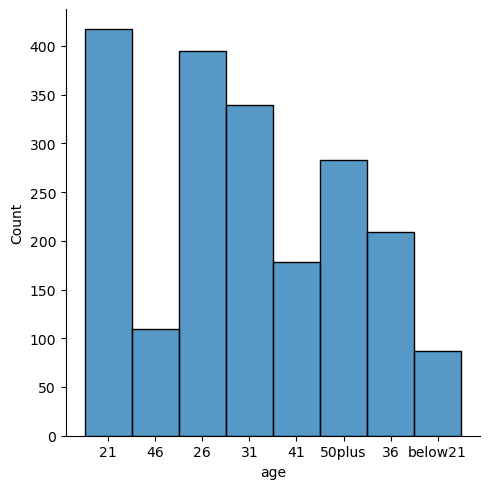

In [26]:
sns.displot(bar['age'])

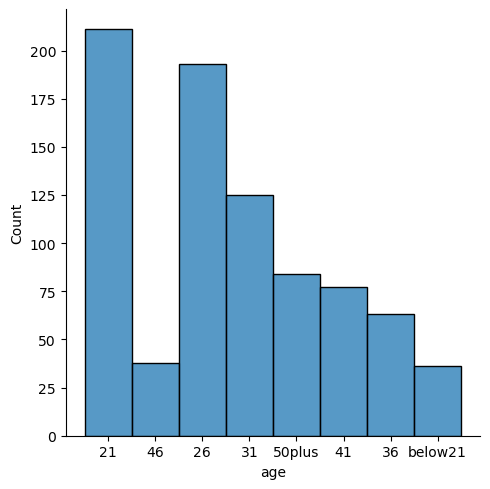

In [27]:
sns.displot(bar.query("Y == 1")['age'])

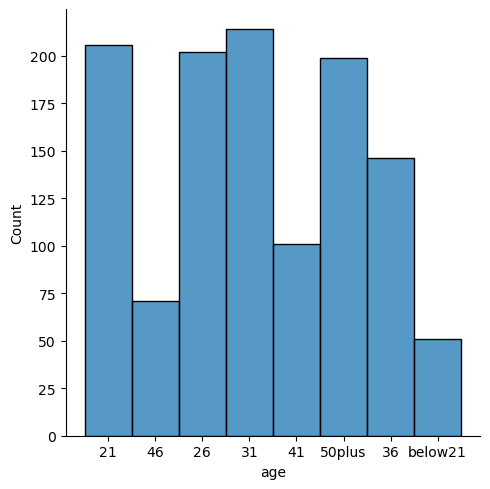

In [28]:
sns.displot(bar.query("Y == 0")['age'])

In [29]:
def coupon_accept_rate(accept, total):
    accept_count = accept.query('Y == 1')['Y'].count()
    total_count = total['Y'].count()
    return accept_count / total_count

In [34]:
accepted_bar_coupon = coupon_accept_rate(bar, bar)
print("Accepted coupon of total bar coupon offered:", accepted_bar_coupon)

#Drive alone
alone = bar.query("passanger == 'Alone'")
print("Drive alone:", coupon_accept_rate(alone, bar))

accepted_coupon_alone = coupon_accept_rate(alone, bar)
accepted_coupon_alone/accepted_bar_coupon

print("Accepted coupon and drive alone:", accepted_coupon_alone/accepted_bar_coupon)

Accepted coupon of total bar coupon offered: 0.41001487357461575
Drive alone: 0.2424392662369856
Accepted coupon and drive alone: 0.5912938331318017


In [ ]:
bar_21 = bar.query("age in ('21','below21')")
print("(1) Accepted coupon and 21 or less:", coupon_accept_rate(bar_21, bar))

bar_1_or_less_over_21 = bar.query("(Bar == 'never' or Bar == 'less1') and age in ('26','31','41','46','36','50plus')")
print("(2) Accepted coupon, visits bar less than 1 per month, over 25:", coupon_accept_rate(bar_1_or_less_over_21, bar))

bar_1_or_less = bar.query("((Bar == 'never' or Bar == 'less1') or age in ('21','below21'))")
print("(1) + (2) Accepted coupon, visits bar less than 1 per month or 21 or less:",coupon_accept_rate(bar_1_or_less, bar))

bar_1_more = bar.query("(Bar == 'gt8' or Bar == '4~8' or Bar == '1~3') and age in ('26','31','41','46','36','50plus')")
print("Accepted coupon, visits bar more than 1 per month, over 25:",coupon_accept_rate(bar_1_more, bar))

In [ ]:
coupon_accept_rate(bar_1_more, bar)

# Findings:
Drivers over 25 that visit a bar more than once per month makes up 14.5% of those that accepted the bar coupons. 
26% of the drivers that accepted bar coupons are those that are either 21 or younger, or visit bars less than once per month.
Drivers 21 or younger makes up 12% of those that accept bar coupons.  Also, of those that accepted coupons, 59% of them drive alone.

# Recommendation:
Targeting drivers that are under 30 and vists bars less frequently and those driving alone will provide the best range of probability of the bar coupons being accepted.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [ ]:
sns.displot(bar["passanger"])

In [ ]:
sns.displot(bar["occupation"], aspect = 1, height = 20)
plt.xticks(rotation = 45)

In [ ]:
#drivers who go to bars more than once a month
bar_once_more = bar.query("Bar == 'gt8' or Bar == '4~8' or Bar == '1~3'")
print("Accepted coupon and visits bar more than one a month:", coupon_accept_rate(bar_once_more, bar))

#had passengers that were not a kid
non_kid_passenger = bar.query("passanger == 'Friends(s)' or passanger == 'Partner'")
print("Accepted coupon and had passengers that were not kids:", coupon_accept_rate(non_kid_passenger, bar))

#had occupations other than farming, fishing, or forestry.
non_f_occupation = bar.query("occupation not in ('Farming Fishing & Forestry')")
print("Accepted coupon and occupations other than farming, fishing, or forestry:", coupon_accept_rate(non_f_occupation, bar))


# Findings:
Drivers that visit a bar more than once per month makes up 20% of the accepted bar coupons.  
Drivers with passengers that were not kids accepted only 5% of the bar coupons.  
40% of drivers that accepted the coupons do not work in farming, fishing, or forestry.

# Recommendation:
Drivers that travel alone and visit bars frequently are good candidates for bar coupons since they have better probability of using the bar coupons.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [ ]:
sns.displot(bar["maritalStatus"])
plt.xticks(rotation = 45)

In [ ]:
print(not_widowed.index.name)
print(bar_once_more.index.name)
print(non_kid_passenger.index.name)

In [ ]:
sns.displot(bar["income"])
plt.xticks(rotation = 45)

In [ ]:
sns.displot(bar['RestaurantLessThan20'])

In [ ]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
not_widowed = bar.query("maritalStatus not in ('Widowed')")
#join_bar_once_more = bar_once_more.join([non_kid_passenger,not_widowed], how="inner")
join_bar_once_more = bar_once_more.merge(non_kid_passenger)
#print(join_bar_once_more)
join_not_widowed = join_bar_once_more.merge(not_widowed)
#print(join_not_widowed)
print("Accepted coupon, go to bars more than once a month, had passengers that were not a kid, and were not widowed:", coupon_accept_rate(join_not_widowed, bar))

#go to bars more than once a month and are under the age of 30 OR
bar_30 = bar.query("age in ('21','below21','26')")
join_bar_once_more_under_30 = bar_once_more.merge(bar_30)
print("Accepted coupon, go to bars more than once a month, and under 30:", coupon_accept_rate(join_bar_once_more_under_30, bar))


#go to cheap restaurants more than 4 times a month and income is less than 50K.
income_under_50K = bar.query("income in ('Less than $12500', '12500 - 24999', '25000 - 37499', '37500 - 49999')")
cheap_restaurants = bar.query("RestaurantLessThan20 in ('gt8','4~8')")
income_resto = income_under_50K.merge(cheap_restaurants)
print("Accepted coupon, go to cheap resto 4 times a month, income less than 50K:", coupon_accept_rate(income_resto, bar))

#alone
alone = bar.query("passanger == 'Alone'")
print("Accepted coupon and did not have passenger:", coupon_accept_rate(alone, bar))

#alone and under 30
alone_young = alone.merge(bar_30)
print("Accepted coupon and under 30:", coupon_accept_rate(alone_young, bar))

print("Accepted coupon, %under 30 of alone:", coupon_accept_rate(alone_young, bar)/coupon_accept_rate(alone, bar))


In [ ]:
accepted_bar_coupon = coupon_accept_rate(bar, bar)
print("Accepted coupon of total bar coupon offered:", accepted_bar_coupon)
accepted_coupon_alone = coupon_accept_rate(alone, bar)
print("Accepted coupon and drive alone:", accepted_coupon_alone/accepted_bar_coupon)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Finding
The acceptance rate for bar coupons is 41%.  Drivers that are alone are more likely to accept the bar coupon, at 59%.
Of those that drive alone and accepted the bar coupons, 53% of them are under 30.
# Recommendation
The best utilization of bar coupons is by drivers that travel alone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Determine which type of coupon is the most successful.

In [ ]:
# The number of coupons offered for each type of coupon
coupons=data.groupby("coupon", as_index=False)[["Y"]].value_counts()
coupons

In [ ]:
sns.catplot(coupons, kind='bar', x='coupon', y='count', hue='Y', errorbar="sd", palette="dark", alpha=.6, height=6)
plt.xticks(rotation = 45)

In [ ]:
total_coupons=data.groupby("coupon")[["Y"]].count()
total_coupons

In [ ]:
accepted_coupons = data.query("Y==1").groupby('coupon')[['Y']].count()
accepted_coupons

In [ ]:
total_coupons.reset_index()
accepted_coupons.reset_index()
accepted_rate = total_coupons.merge(accepted_coupons, on='coupon')
acc_rate_reset = accepted_rate.reset_index()
acc_rate_reset

In [ ]:
acc_rate_reset["acceptedRate"] = acc_rate_reset['Y_y']/acc_rate_reset["Y_x"]
acc_rate_reset

In [ ]:
acc_rate=acc_rate_reset.rename(columns={"Y_y": "accepted", "Y_x": "offered"})
acc_rate

In [ ]:
import plotly.express as px
fig = px.scatter(acc_rate, x="offered", y="acceptedRate", color="coupon",
                 size='accepted')
fig.show()

# Finding
The highest coupon acceptance rate is for Carry out & Take away at 74%.  Cheap restaurant coupons come second at 71%.  Coupons that are the most offered is for Coffe House, however, the acceptance rate is only 50%.  Coupons for expensive restaurants and bars did not seem to perform well with acceptance at only around 40%.
# Recommendation
Focusing on Carry out & Take away coupons will more likely lead to better coupon utilization overall.

2. What are the characteristics of the drivers that accept Carry out & Take away coupons?

In [ ]:
togo = data.query("coupon == 'Carry out & Take away'")
togo

In [ ]:
togo_drivers=togo.groupby("Y", as_index=False).value_counts()
togo_drivers

In [ ]:
togo_21 = togo.query("age in ('21','below21')")
print("(1) Accepted coupon and 21 or less:", coupon_accept_rate(togo_21, togo))

togo_1_or_less_over_21 = togo.query("(CarryAway == 'never' or CarryAway == 'less1') and age in ('26','31','41','46','36','50plus')")
print("(2) Accepted coupon, CarryAway less than 1 per month, over 25:", coupon_accept_rate(togo_1_or_less_over_21, bar))

togo_1_or_less = togo.query("((CarryAway == 'never' or CarryAway == 'less1') or age in ('21','below21'))")
print("(1) + (2) Accepted coupon, CarryAway less than 1 per month or 21 or less:",coupon_accept_rate(togo_1_or_less, bar))

togo_1_more = togo.query("(CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3') and age in ('26','31','41','46','36','50plus')")
print("Accepted coupon, CarryAway more than 1 per month, over 25:",coupon_accept_rate(togo_1_more, bar))

#drivers who CarryAway more than once a month
togo_once_more = togo.query("CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3'")
print("Accepted coupon and CarryAway more than one a month:", coupon_accept_rate(togo_once_more, bar))

#had passengers that were not a kid
non_kid_passenger = togo.query("passanger == 'Friends(s)' or passanger == 'Partner'")
print("Accepted coupon and had passengers that were not kids:", coupon_accept_rate(non_kid_passenger, bar))

# Recommendation
Drivers that are accustomed to eating Carry away food seem to be the best audience for the carry away coupons.

3. Examine the Occupations of drivers that accept CarryAway coupons.

In [ ]:
occupations=togo.groupby("occupation", as_index=False)[["Y"]].value_counts().sort_values(by='count')
occupations

In [ ]:
sns.catplot(occupations, kind='bar', x='occupation', y='count', hue='Y', errorbar="sd", palette="dark", alpha=.6, height=20)
plt.xticks(rotation = 45)

In [ ]:
countOccupations=togo.groupby("occupation", as_index=False)[['occupation']].value_counts().sort_values(by='count')
countOccupations

In [ ]:
acceptOccupation = occupations.merge(countOccupations, on='occupation')
acc_occ_rate=acceptOccupation.rename(columns={"count_x": "countY", "count_y": "offered"})
acc_occ_rate['rate']=acc_occ_rate['countY']/acc_occ_rate['offered']
acc_occ_rate

In [ ]:
togo_acc_rate_t = acc_occ_rate.query("Y == 1")
togo_acc_rate = togo_acc_rate_t.rename(columns={"countY": "accepted"})
togo_acc_rate

In [ ]:
fig = px.scatter(togo_acc_rate, x="offered", y="rate", color="occupation", size='accepted')
fig.show()

# Findings & Recommendation:
the highest acceptance rates for carry away coupons occur among Building & GroundCleaning & Maintenance, Protective Service and Construction & Extraction at above 90% acceptance rates.  Perhaps it would be worthwhile to target these occupation more instead of the current occupations of Unemployed and Students with only 75% and 68% acceptance rates. 

4. Does having passengers influence the acceptance rates of the Carry Away coupons?

In [ ]:
passengers=togo.groupby("passanger", as_index=False)[["Y"]].value_counts().sort_values(by='count')
passengers

In [ ]:
countPassengers=togo.groupby("passanger", as_index=False)[['passanger']].value_counts().sort_values(by='count')
countPassengers

In [ ]:
acceptPassenger = passengers.merge(countPassengers, on='passanger')
acc_pass_rate=acceptPassenger.rename(columns={"count_x": "accepted", "count_y": "offered"})
acc_pass_rate['rate']=acc_pass_rate['accepted']/acc_pass_rate['offered']
togo_acc_pass_rate = acc_pass_rate.query("Y == 1")
togo_acc_pass_rate

In [ ]:
fig = px.scatter(togo_acc_pass_rate, x="offered", y="rate", color="passanger", size='accepted')
fig.show()

# Finding and Recommendation:
It seems the highest acceptance rate for CarryAway coupons occured when a driver is traveling with friends, at 75%.  However, acceptance rates in general does not seem to correlate with whether or not a driver is alone or with a passenger, as all of them are around the 70% area.